In [64]:
import pandas as pd
import haversine as hs
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [34]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [35]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [37]:
data.shape

(200000, 8)

In [38]:
data.dropna(axis=0,inplace = True)
data.shape

(199999, 8)

In [39]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime,errors='coerce')
data["day"] = data.pickup_datetime.dt.day
data["month"] = data.pickup_datetime.dt.month
data["year"] = data.pickup_datetime.dt.year
data["dayofweek"] = data.pickup_datetime.dt.dayofweek

In [40]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,3
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,3


In [41]:
data.drop(['pickup_datetime'],axis=1,inplace = True)

In [42]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,3
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,0
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,3


In [43]:
data.drop(['key'],axis=1,inplace = True)

In [44]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,3


In [45]:
data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

In [46]:

for i in data:
    high = data[i].mean() + 1.5*data[i].std()
    low = data[i].mean() - 1.5*data[i].std()
    data = data[(data[i] < high) & (data[i] > low)]


In [47]:
data.shape

(81211, 10)

In [48]:
distances = []
for index,i in data.iterrows():
    dist = hs.haversine((i['pickup_latitude'],i['pickup_longitude']),(i['dropoff_latitude'],i['dropoff_longitude']))
    distances.append(dist)


In [49]:
data['distance'] = distances

In [50]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,distance
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4,2.457593
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4,1.661686
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,12,2,2011,5,0.000000
8,9.7,-73.975187,40.745767,-74.002720,40.743537,1,17,2,2012,4,2.332714
13,10.9,-73.953352,40.767382,-73.972510,40.796137,1,25,6,2011,5,3.581256


<AxesSubplot:>

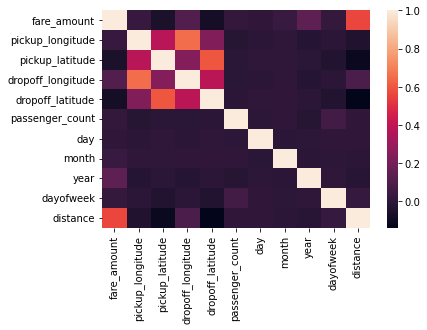

In [51]:
sns.heatmap(data.corr())

In [52]:
# ## Drop latitudes
# data.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1,inplace = True)

<AxesSubplot:>

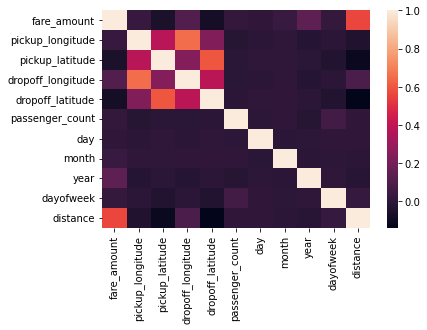

In [53]:
sns.heatmap(data.corr())

In [54]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,distance
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4,2.457593
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4,1.661686
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,12,2,2011,5,0.000000
8,9.7,-73.975187,40.745767,-74.002720,40.743537,1,17,2,2012,4,2.332714
13,10.9,-73.953352,40.767382,-73.972510,40.796137,1,25,6,2011,5,3.581256


In [55]:
X = data.iloc[:,1:11]
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,distance
1,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4,2.457593
3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4,1.661686
5,-73.969019,40.755910,-73.969019,40.755910,1,12,2,2011,5,0.000000
8,-73.975187,40.745767,-74.002720,40.743537,1,17,2,2012,4,2.332714
13,-73.953352,40.767382,-73.972510,40.796137,1,25,6,2011,5,3.581256


In [56]:
y = data.iloc[:,0]
y.head()

1      7.7
3      5.3
5      4.9
8      9.7
13    10.9
Name: fare_amount, dtype: float64

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [58]:
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)
y_pred = model_lin.predict(X_test)

In [59]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.09798713042737406
19.39515335296461


In [60]:
model_lin = RandomForestRegressor()
model_lin.fit(X_train,y_train)
y_pred = model_lin.predict(X_test)

In [61]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.7626582226433045
5.103342007835572
